In [61]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\nimet\\predictit\\apple_phone_dataset_update_new_visualized.csv")
df=df.drop_duplicates()

In [68]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [65]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)

In [69]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [71]:
from sklearn import tree
dst = tree.DecisionTreeClassifier()

In [ ]:
from sklearn.svm import SVC
sv = SVC()

In [72]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [73]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=2.0)

In [74]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=7.0)

In [76]:
from sklearn.gaussian_process import GaussianProcessRegressor
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

NameError: name 'C' is not defined

In [77]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)


In [78]:
df.head(5)

,Condition,Model,Location,Box,Space,prc
0,Used,iPhone 11,"Moratuwa, Colombo",0,128,137990
1,Used,iPhone 11,"Hettipola, Kurunegala",0,64,120000
2,Used,iPhone 11,"Panadura, Kalutara",0,128,127990
3,Used,iPhone 11,"Polonnaruwa City, Polonnaruwa",0,64,126500
4,New,iPhone 11,"Kiribathgoda, Gampaha",0,128,162900


In [79]:
gr=df.drop(['prc'],axis='columns')
gr=gr.loc[2].to_numpy()
gr

array(['Used', 'iPhone 11', ' Panadura,  Kalutara', 0, 128], dtype=object)

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.classes_ = saved_classes 

NameError: name 'saved_classes' is not defined

In [95]:
dlfe=df
dlfe.Location=le.fit_transform(dlfe.Location)
dlfe.Condition=le.fit_transform(dlfe.Condition)
dlfe.Model=le.fit_transform(dlfe.Model)
dlfe.Box=le.fit_transform(dlfe.Box)
dlfe

,Condition,Model,Location,Box,Space,prc
0,1,0,144,0,128,137990
1,1,0,85,0,64,120000
2,1,0,161,0,128,127990
3,1,0,170,0,64,126500
4,0,0,115,0,128,162900
...,...,...,...,...,...,...
20635,1,10,103,0,256,185000
20636,1,10,22,0,128,187500
20637,1,10,186,0,128,187000
20638,0,10,6,0,128,210000


In [96]:
pr=dlfe.drop(['prc'],axis='columns')

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pr,dlfe.prc,test_size=0.2,random_state=8) 

In [98]:
reg.fit(x_train, y_train)

LinearRegression()

In [99]:
reg.score(x_test,y_test)

0.7168476000771626

In [100]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

In [101]:
reg.fit(x_train, y_train)

LinearRegression()

In [102]:
reg.score(x_test,y_test)

-1.6974588696787514

In [91]:
x_test.shape


(2830, 5)

In [103]:
gr.Location=le.fit_transform(gr.Location)
gr.Condition=le.fit_transform(gr.Condition)
gr.Model=le.fit_transform(gr.Model)
gr.Box=le.fit_transform(gr.Box)

AttributeError: 'numpy.ndarray' object has no attribute 'Location'

In [104]:
reg.predict([gr.loc[2]])

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [24]:
confusion_matrix = pd.crosstab(reg.predict(x_test), y_test, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix.head(10))

Predicted       3000    4000    4500    5000    5500    6000    6500    \
Actual                                                                   
-391172.715021       0       0       0       0       0       0       0   
-328846.108233       0       0       0       0       0       0       0   
 6407.279056         0       0       0       0       0       0       0   
 6939.362726         0       0       0       0       0       0       0   
 6955.904738         0       0       0       0       0       0       0   
 6996.109737         0       0       0       0       0       0       0   
 6996.937452         0       0       0       0       0       0       0   
 7070.291982         0       0       0       0       0       0       0   
 7253.348279         0       0       0       0       0       0       0   
 7339.021937         0       0       0       0       0       0       0   

Predicted       7000    7500    7950    ...  424990  425000  429000  430000  \
Actual                          

Text(0.5, 1.0, 'Scatter Plot Example')

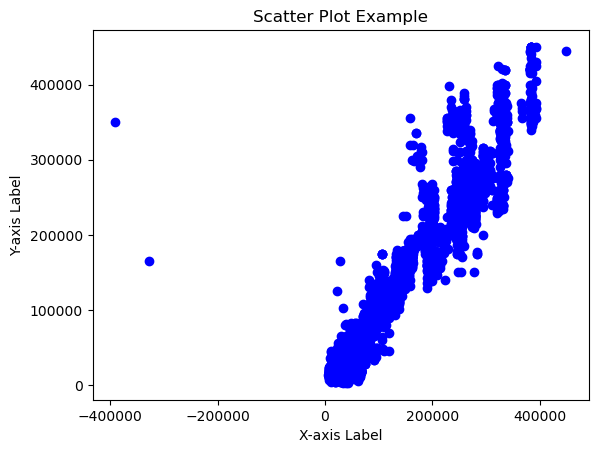

In [34]:
plt.scatter(reg.predict(x_test), y_test, label='Data Points', color='blue', marker='o')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')

# Others

In [105]:
for train_index, test_index in folds.split(pr,dlfe.prc):
    X_train, X_test, y_train, y_test = pr[train_index], pr[test_index], dlfe.prc[train_index], dlfe.prc[test_index]

C:\Users\nimet\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


KeyError: "None of [Int64Index([    4,     6,     7,     8,    10,    21,    26,    29,    30,\n               37,\n            ...\n            14138, 14139, 14140, 14141, 14142, 14143, 14144, 14145, 14146,\n            14147],\n           dtype='int64', length=12733)] are in the [columns]"

In [106]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [107]:
rfc.score(x_test,y_test)

0.01342756183745583

In [108]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

C:\Users\nimet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.011307420494699646

In [109]:
dst.fit(x_train,y_train)
dst.score(x_test,y_test)

0.012720848056537103

In [110]:
km.fit(x_train,y_train)
km.score(x_test,y_test)

-2.1447271063021058e+24

In [22]:
ridge.fit(x_train,y_train)
ridge.score(x_test,y_test)

0.7159514863436207

In [21]:
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)

0.7159498554295022

In [ ]:
gp.fit(x_train,y_train)
gp.score(x_test,y_test)

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import joblib  # For saving and loading objects
df=pd.read_csv("C:\\Users\\nimet\\predictit\\apple_phone_dataset_update_new_visualized.csv")
df=df.drop_duplicates()
model = LinearRegression()
# Training data with multiple categorical variables
# data = {'Category1': ['A', 'B', 'C', 'A', 'B'],
#         'Category2': ['X', 'Y', 'Z', 'X', 'Y'],
#         'Numeric': [10, 20, 15, 30, 25]}
# new_data =df.loc[3]
# df = pd.DataFrame(data)

dfprc=df['prc']
df=df.drop(['prc','Location'],axis='columns')
# new_data =df.loc[2]
# new_data = pd.DataFrame([df.loc[1190]])
new_data=pd.DataFrame.from_dict({
    "Condition": ["New"],
    "Model": ["iPhone 7"],
    "Box": [1],
    "Space": [64],
    
    
    
})
print(new_data)
# Initialize dictionaries to store label encoders for each variable
label_encoders = {}

# Train and save label encoders for each categorical variable
for column in df.select_dtypes(include=['object']):
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder

# Save label encoders to files
for variable, encoder in label_encoders.items():
    joblib.dump(encoder, f"{variable}_label_encoder.pkl")

from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_test, y_train, y_test = train_test_split(df,dfprc,test_size=0.2,random_state=8)     

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)







model = LinearRegression()
model.fit(x_train, y_train) 
print(model.score(x_test,y_test))
# Replace 'Target' with your actual target column
# model.predict(x_test)
# Now, when you want to make predictions on new data:
# Load the label encoders
loaded_label_encoders = {}
for variable in label_encoders:
    loaded_label_encoders[variable] = joblib.load(f"{variable}_label_encoder.pkl")

# Prepare new data for prediction (use the same column names as in training)
 

# Apply the corresponding label encoder to each categorical variable
for column in new_data.select_dtypes(include=['object']):
    new_data[column] = loaded_label_encoders[column].transform(new_data[column])

# Make predictions with your trained linear regression model on the new data
new_data = poly.fit_transform(new_data)
predictions = model.predict(new_data)

print(predictions[0],dfprc.loc[1190])
reshaped_array = np.array(predictions[0]).reshape(-1, 1)
# print(model.score(reshaped_array,dfprc.loc[1190]))

  Condition     Model  Box  Space
0       New  iPhone 7    1     64
-1.7744627365347494
21217.046236519876 33500


In [17]:
import pandas as pd

# JSON data as a dictionary (replace this with your JSON data)
# json_data = 

# Convert JSON data to a DataFrame
df = pd.DataFrame.from_dict({
    "Condition": ["New"],
    "Model": ["iPhone XS"],
    "Location": ["Kalutara City, Kalutara"],
    "Box": [0],
    "Space": [512]
})

# Display the DataFrame
print(df)








  Condition      Model                 Location  Box  Space
0       New  iPhone XS  Kalutara City, Kalutara    0    512


In [2]:
import pickle
pickle.dump(model, open('predict_model_without_location.pkl', 'wb'))

In [3]:
dfprc.loc[19] 

147000

In [4]:
json_data = df.loc[10].to_json()
json_data

'{"Condition":1,"Model":0,"Box":0,"Space":128}'